In [1]:
import pandas as pd
inventory_df = pd.read_csv('data/inventory_data.csv')
patient_df = pd.read_csv('data/patient_data.csv')

In [2]:

patient_df.describe()


,Bed_Days
count,500.000000
mean,7.364000
std,4.079803
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,14.000000


In [3]:

patient_df.head()  
patient_df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           500 non-null    object
 1   Admission_Date       500 non-null    object
 2   Discharge_Date       500 non-null    object
 3   Primary_Diagnosis    500 non-null    object
 4   Procedure_Performed  500 non-null    object
 5   Room_Type            500 non-null    object
 6   Bed_Days             500 non-null    int64 
 7   Supplies_Used        500 non-null    object
 8   Equipment_Used       500 non-null    object
 9   Staff_Needed         500 non-null    object
dtypes: int64(1), object(9)
memory usage: 39.2+ KB


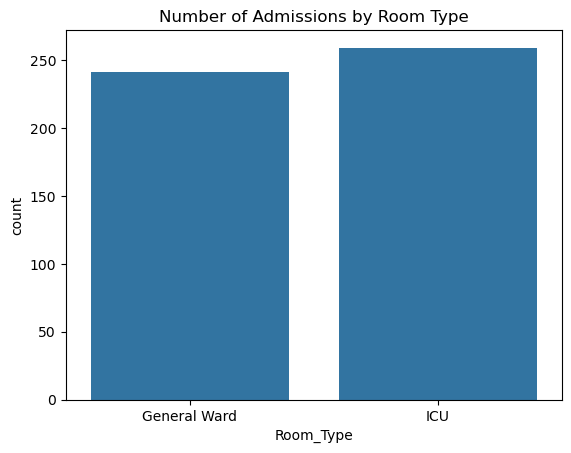

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simpler version
sns.countplot(x='Room_Type', data=patient_df)
plt.title('Number of Admissions by Room Type')
plt.show()


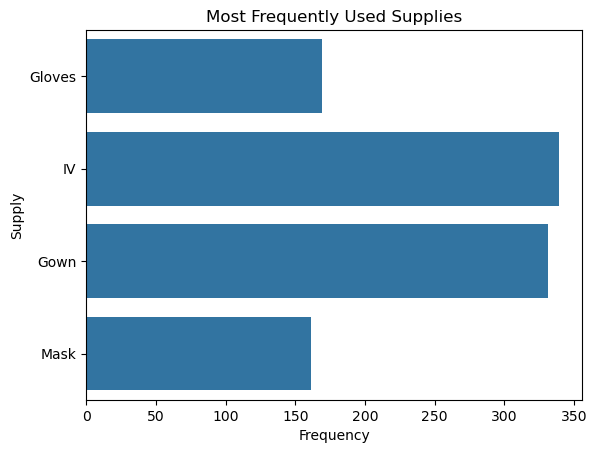

In [5]:
# Count the most common supplies used 
supplies_list = patient_df['Supplies_Used'].dropna().str.split(', ').explode()

sns.countplot(y=supplies_list)
plt.title('Most Frequently Used Supplies')
plt.xlabel('Frequency')
plt.ylabel('Supply')
plt.show()


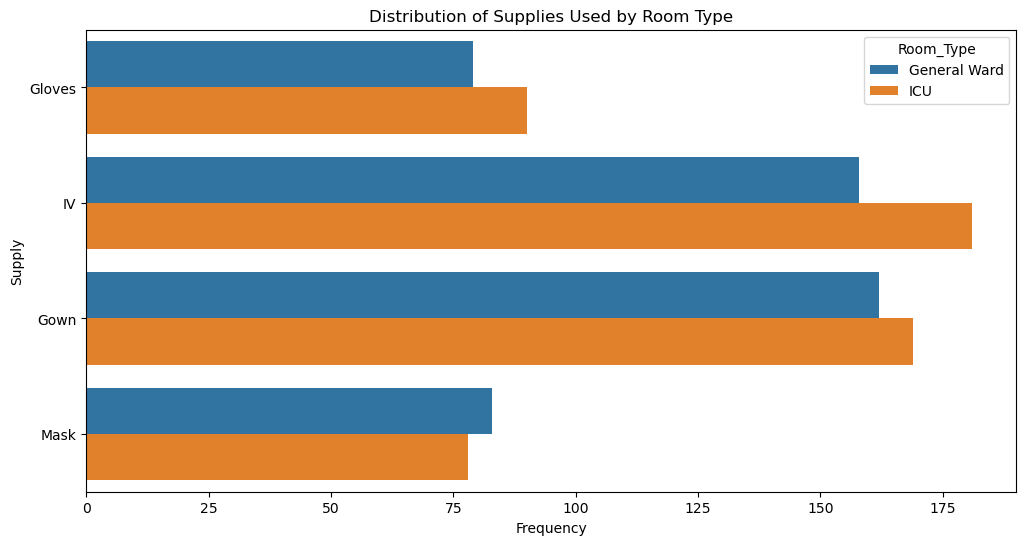

In [6]:

supplies = patient_df['Supplies_Used'].dropna().str.split(', ').explode()

# Plot the frequency of each supply used by room type
plt.figure(figsize=(12, 6))
sns.countplot(y=supplies, hue=patient_df['Room_Type'].loc[supplies.index])
plt.title('Distribution of Supplies Used by Room Type')
plt.xlabel('Frequency')
plt.ylabel('Supply')
plt.show()


analyzing the frequency of supplies such as Gloves, IV, Gowns, and Masks, we observed that certain supplies are used more frequently in specific departments. The ICU tended to use a higher volume of IV and Gowns, while General Ward usage was more evenly distributed across supplies. This analysis highlights potential areas for optimizing supply distribution, ensuring that each department has adequate resources based on actual usage patterns.

In [7]:

supplies_exploded = patient_df['Supplies_Used'].dropna().str.split(', ').explode()
procedures_exploded = patient_df['Procedure_Performed'].repeat(patient_df['Supplies_Used'].dropna().str.split(', ').str.len())
exploded_data = pd.DataFrame({'Supply': supplies_exploded, 'Procedure_Performed': procedures_exploded})


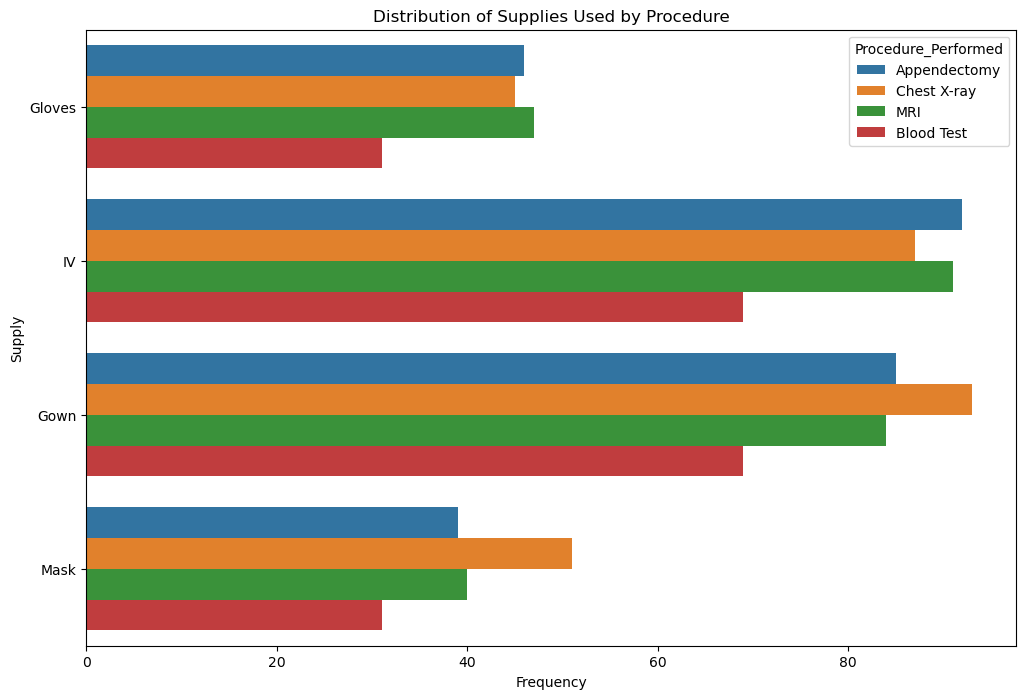

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=exploded_data, y='Supply', hue='Procedure_Performed')
plt.title('Distribution of Supplies Used by Procedure')
plt.xlabel('Frequency')
plt.ylabel('Supply')
plt.show()


The exploration of the patient table regarding the distribution of supplies by department also revealed interesting relationships between procedures performed and the supplies used. For instance, Appendectomy and Chest X-ray procedures showed higher usage of Gloves and IV, reflecting the typical medical needs for these treatments. The ICU patients, requiring more intensive care, showed a higher use of Gowns and Masks, while General Ward patients had a more balanced use of supplies across procedures. This analysis highlights the need for targeted supply allocation based on both room types and procedures, providing a more nuanced view of supply needs and offering potential optimization opportunities for both inventory management and departmental supply distribution.







